/tmp/ipykernel_627579/402294096.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # 设置画图的风格
100%|██████████| 72/72 [00:00<00:00, 153.29it/s]


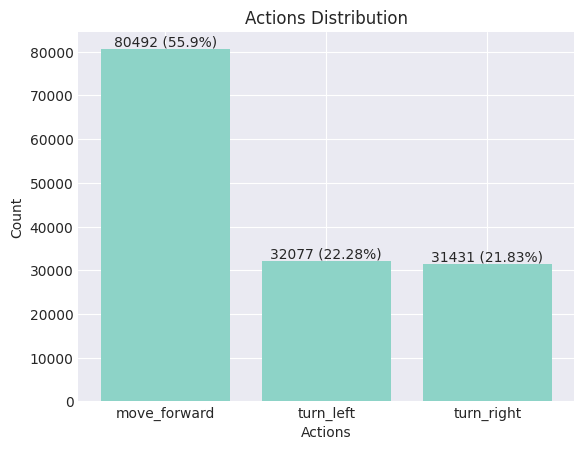

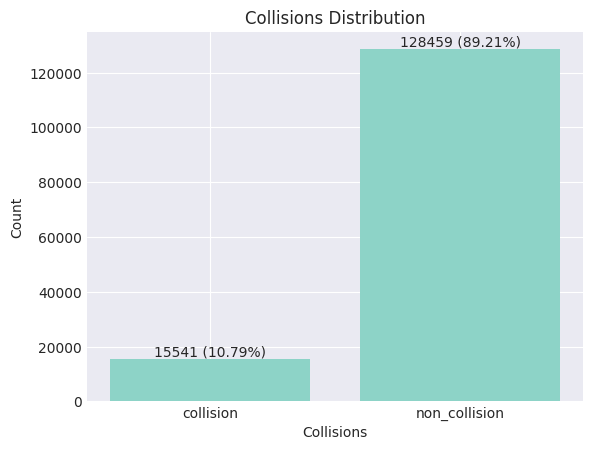

{'move_forward': 80492, 'turn_left': 32077, 'turn_right': 31431}
{'collision': 15541, 'non_collision': 128459}


100%|██████████| 14/14 [00:00<00:00, 115.49it/s]


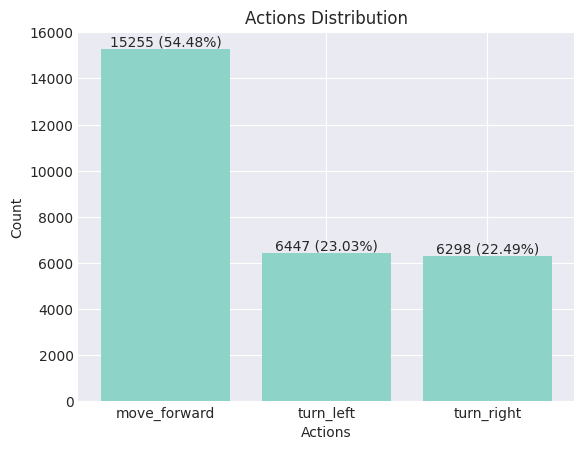

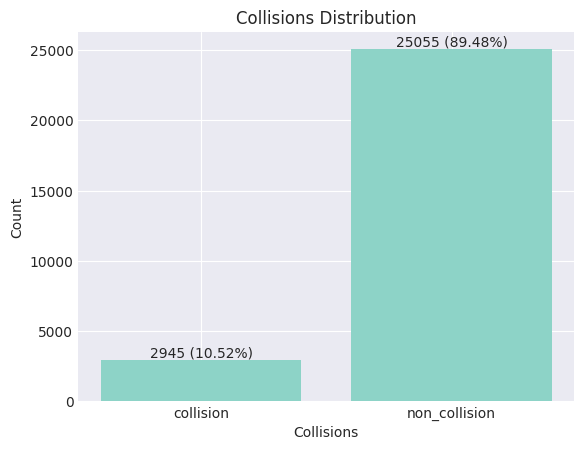

{'move_forward': 15255, 'turn_left': 6447, 'turn_right': 6298}
{'collision': 2945, 'non_collision': 25055}


100%|██████████| 3/3 [00:00<00:00, 143.53it/s]


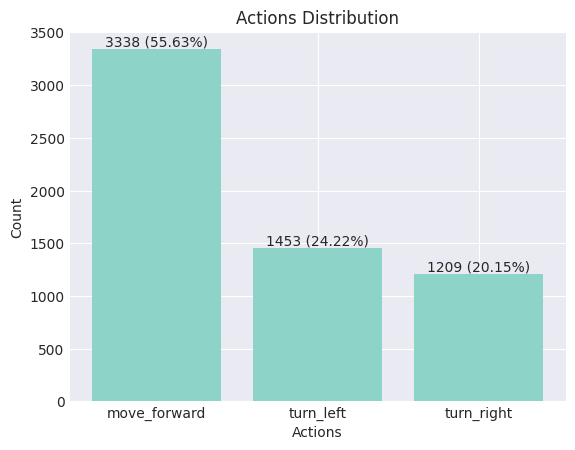

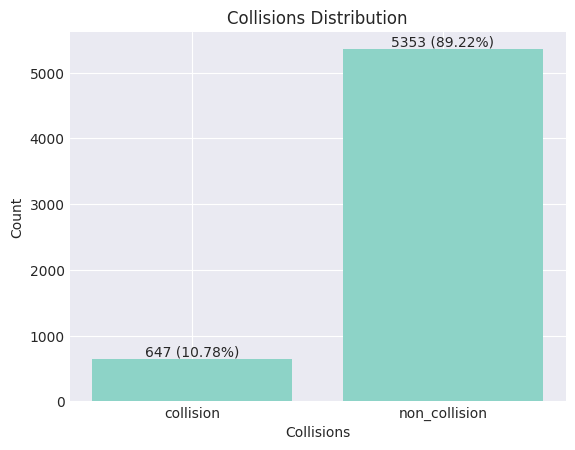

{'move_forward': 3338, 'turn_left': 1453, 'turn_right': 1209}
{'collision': 647, 'non_collision': 5353}


In [2]:
import json
import numpy as np
import os.path as osp
from glob import glob
import gzip
from tqdm import tqdm

import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid') # 设置画图的风格 


def from_json(scene):
    '''
    Return:
        action_ids：List[int]
        pose_delta：List[List[float]]
    '''
    actions_map = {1: 'move_forward', 2: 'turn_left', 3: 'turn_right'}
    actions_dict = {
        'move_forward': 0,
        'turn_left': 0,
        'turn_right': 0,
    }
    collision_map = {0: 'non_collision', 1: 'collision'}

    collisions_dict = {
        'collision': 0,
        'non_collision': 0,
    }
    with gzip.open(osp.join(scene, 'pose.json.gz'), 'rt') as f:
        data = json.load(f)
        for item in data:
            action = int(item['action_id'])
            actions_dict[actions_map[action]] += 1
            collision = int(item['collision'])
            collisions_dict[collision_map[collision]] += 1

    return actions_dict, collisions_dict

def count_actions_dist(data_dir, split):
    dataset_dir = osp.join(data_dir, split)
    scene_pths = glob(dataset_dir + '/*')
    all_actions_dict = {
        'move_forward': 0,
        'turn_left': 0,
        'turn_right': 0, 
    }
    all_collisions_dict = {
        'collision': 0,
        'non_collision': 0,
    }
    screen_dict = {}

    for scene in tqdm(scene_pths):
        scene_name = scene.split('/')[-1]
        actions_dict, collisions_dict = from_json(scene)
        actions_dict['all'] = actions_dict['move_forward'] + actions_dict['turn_left'] + actions_dict['turn_right']
        all_actions_dict['move_forward'] += actions_dict['move_forward']
        all_actions_dict['turn_left'] += actions_dict['turn_left']
        all_actions_dict['turn_right'] += actions_dict['turn_right']

        screen_dict[scene_name] = actions_dict 
        
        all_collisions_dict['collision'] += collisions_dict['collision']
        all_collisions_dict['non_collision'] += collisions_dict['non_collision']
    
    # Save actions_dict and screen_dict to action_count.txt file
    with open(f'action_count_{split}.txt', 'w') as f:
        f.write('Actions Distribution:\n')
        for action, count in all_actions_dict.items():
            f.write(f'{action}: {count}\n')
        f.write('\nScreen Distribution:\n')
        for scene, actions in screen_dict.items():
            f.write(f'{scene}:\n')
            for action, count in actions.items():
                f.write(f'    {action}: {count}\n')
            f.write('\n')
    
    # Convert actions_dict to a list of values
    values = list(all_actions_dict.values())
    
    # Calculate the percentage of each value in the list
    total = sum(values)
    percentages = [round((value/total)*100, 2) for value in values]
    
    # Create a bar plot with labels for each action and its percentage
    plt.bar(all_actions_dict.keys(), values)
    for i in range(len(all_actions_dict)):
        plt.text(i, values[i], f"{values[i]} ({percentages[i]}%)", ha='center', va='bottom')
    
    # Add labels and title to the plot
    plt.xlabel('Actions')
    plt.ylabel('Count')
    plt.title('Actions Distribution')
    
    # Show the plot
    plt.show()

    
    # Convert all_collisions_dict to a list of values
    values = list(all_collisions_dict.values())
    
    # Calculate the percentage of each value in the list
    total = sum(values)
    percentages = [round((value/total)*100, 2) for value in values]
    
    # Create a bar plot with labels for each collision type and its percentage
    plt.bar(all_collisions_dict.keys(), values)
    for i in range(len(all_collisions_dict)):
        plt.text(i, values[i], f"{values[i]} ({percentages[i]}%)", ha='center', va='bottom')
    
    # Add labels and title to the plot
    plt.xlabel('Collisions')
    plt.ylabel('Count')
    plt.title('Collisions Distribution')
    
    # Show the plot
    plt.show()

    
    print(all_actions_dict)
    print(all_collisions_dict)
    # print(screen_dict)



if __name__ =='__main__':

    count_actions_dist("/home/yzc1/workspace/OccAnt/data/vo_dataset", split="train")
    count_actions_dist("/home/yzc1/workspace/OccAnt/data/vo_dataset", split="val")
    count_actions_dist("/home/yzc1/workspace/OccAnt/data/vo_dataset", split="val_mini")